# 1. DBSCAN
Consider the following data set with the class label c={A,B}, and the coordinates x and y:

    P1={A,1,3}, P2={A,2,3}, P3={A,4,1}, P4={A,4,4}, P5={A,5,2},
    P6={A,5,5}, P7={A,5,6}, P8={B,6,1}, P9={B,5,1}, P10={B,6,3},
    P11={B,6,2}, P12={B,5,3}, P13={B,5,2}, P14={B,4,2}, 
    P15={B,4,5}

The following code visualizes the points (some points might be drawn on top of each other)

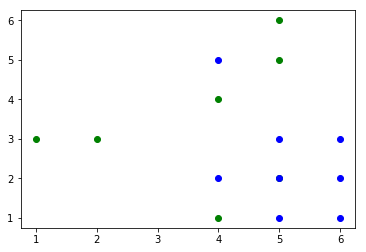

In [6]:
import numpy as np
import matplotlib.pyplot as plt

points_A = np.array([[1,3],
[2,3],
[4,1],
[4,4],
[5,2],
[5,5],
[5,6]])
points_B = np.array([
[6,1],
[5,1],
[6,3],
[6,2],
[5,3],
[5,2],
[4,2],
[4,5]])

plt.plot(points_A[:,0], points_A[:,1], 'go')
plt.plot(points_B[:,0], points_B[:,1], 'bo')
plt.show()


<b>Exercise 0: </b>What is the definition of `core-object` and epsilon neighbourhood $N_\epsilon$?

<b>Exercise 1: </b>Cluster the dataset using DBSCAN. 

<b>Exercise 2: </b>Compute core-objects and border-objects for each density-based cluster and list all noise objects. Use the Euclidean distance with $\epsilon =1.5$ and  `MinPts`$ = 3$. 

<b>Exericse 3: </b>What is the F1 measure?

# 2. OPTICS
Consider the following data set 

    (2,0);(2,0);(3,0); (3,0); (3,0); (3,0); (4,0); (4,0); 
    (3,1);(3,1); (3,1); (4,1); (4,1); (4,1); (0,4); (0,4); 
    (0,5); (0,5);(1,4); (1,4); (1,5); (1,5); (2,4); (3,4); 
    (3,4); (3,5); (3,5); (3,5); (4,4); (4,4); (4,5); 
    (4,5); (4,5)

The following code visualizes the points (some points might be drawn on top of each other)

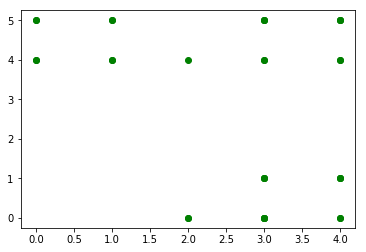

In [8]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(2,0), (2,0), (3,0), (3,0), (3,0), (3,0), (4,0), (4,0), (3,1), (3,1), (3,1), (4,1), (4,1), (4,1), (0,4), (0,4), (0,5), (0,5), (1,4), (1,4), (1,5), (1,5), (2,4), (3,4), (3,4), (3,5), (3,5), (3,5), (4,4), (4,4), (4,5), (4,5), (4,5)])

plt.plot(points[:,0], points[:,1], 'go')
plt.show()

<b>Exercise 1: </b>Draw the OPTICS plot of the 2D dataset using Manhatten distance, `MinPTS`$=6$ and $\epsilon=2$. Start with $o=(0, 4)$, then, once the `ControlList` is empty, restart with $p=(2, 0)$. 

Note: you do not need to do the actual computation, but you may refer to the figure for reading off the reachability and core distances, respectively.

<b>Exercise 2: </b>Given the resulting OPTICS plot, which two settings $\epsilon_1$ and $\epsilon_2$ correspond to a DBSCAN that outputs two and three clusters, respectively?

# 3. Outlier Detection
Assume Manhattan distance and the objects as depicted below.

a) For which parameters are the two highlighted objects outliers according to the distance-based definition?

b) According to cluster-based outlier detection using DBSCAN with MinPts = 4 (including the object itself) and $\epsilon=3$ which objects are outliers?

c) Determine the LOF for the two highlighted objects p1=(1,5), p2=(8,1) for k=3, MinPts=3.

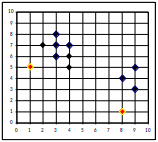

# 4. SUBCLU
Consider the followinng six-dimensional data 

In [ ]:
X = np.array([[6,23,22,21,31,49],
[7,22,21,20,51,76],
[26,85,75,52,53,50],
[28,94,76,63,76,87],
[29,45,93,51,54,51],
[35,73,76,51,52,50],
[38,23,22,21,33,61],
[41,22,21,21,32,99],
[56,15,66,39,36,66],
[58,1,14,53,52,51],
[66,1,40,19,86,13],
[70,90,25,32,70,65],
[71,23,21,20,3,81],
[80,19,42,23,57,1],
[82,80,6,54,81,81],
[82,81,38,35,81,82],
[82,81,77,57,81,82],
[82,83,44,59,81,83],
[82,81,35,86,81,81],
[84,80,66,10,81,81],
[86,33,59,51,54,50],
[89,34,36,53,54,51],
[92,25,27,40,14,22]])

a) Compute two kNN plots to determine a meaningful parameter setting for the density-based clustering. Assume you are searching for 3 dimensional subspace clusters. Use as a possible subspace the second, third and fourth dimension. Choose a meaningful epsilon value if we assume (k=4) as meaningful setting.

b) How does the kNN plot change if we also include the first dimension as a relevant 4d subspace?

c) Use the SUBCLU algorithm with parameter setting $\epsilon=3$ and `MinPts`$=4$ to compute subspace clusters. What are the necessary bottom-up computations (especially consider the pruning step of SUBCLU) and the final density-based subspace clustering (assume only 3 and 4 dimensional clusters as relevant)?

# 5. AutoEncoder (optional)
The following code attempts to reduce the dimensionality of the MNIST dataset using a simple AutoEncoder. We do not expect you to understand the code, just run it and look at the figure. 

Try run it:

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


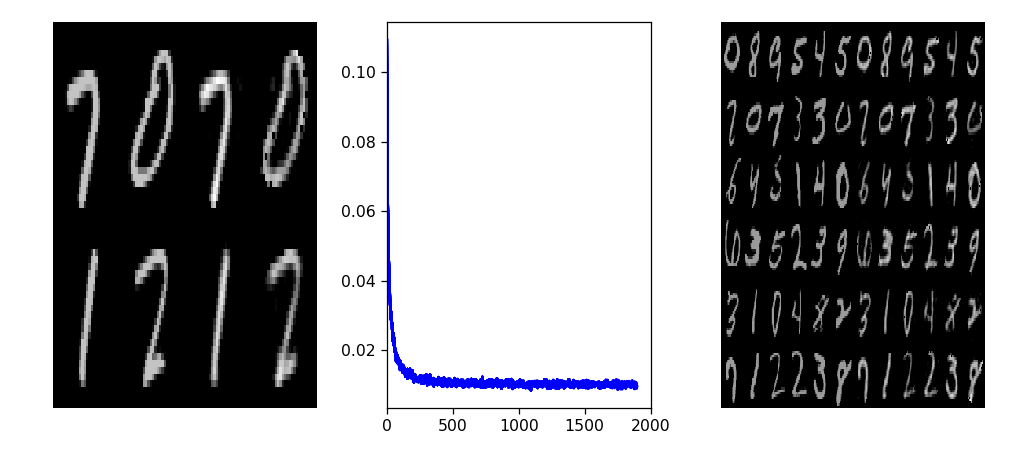

Step: 1900	Loss: 0.005903

In [10]:
# Interactive Plotting
%matplotlib notebook 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

# Name for saving autoEncoder model with timestamp
model_name_autoenc     = "models/auto_enc25.ckpt"

# Import MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/")

# Training Constants
learning_rate = 0.005
batch_size = 128
train_steps = 2000

# Architecture
d = 28**2
h = 100

X = tf.placeholder("float", [None, d])
L = tf.placeholder("float", [None, h])

var_init = tf.contrib.layers.xavier_initializer()

w_enc = tf.Variable(var_init( [d, h] ))
b_enc = tf.Variable(var_init( [h] ))
w_dec = tf.Variable(var_init( [h, d] ))
b_dec = tf.Variable(var_init( [d] ))

enc_X = tf.nn.relu(tf.matmul(X, w_enc) + b_enc)
dec_X = tf.nn.relu(tf.matmul(enc_X, w_dec) + b_dec)

dec = tf.nn.relu(tf.matmul(L, w_dec) + b_dec) # for use to later decoding latent codes. 

loss = tf.reduce_mean(tf.pow( X - dec_X, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

saver = tf.train.Saver()

init = tf.global_variables_initializer()

# initialize interactive plotting
fig, (ax_train, ax_score, ax_done) = plt.subplots(1, 3, figsize=(9,4)) 
fig.tight_layout()
ax_train.axis("off")
ax_done.axis("off")
ax_score.set_xlim(0, train_steps)
visualize, _ = mnist.test.next_batch(4) 
loss_vals = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1, train_steps):
        
        batch, _ = mnist.train.next_batch(batch_size)
        _, current_loss = sess.run([optimizer, loss], feed_dict={X: batch})
        loss_vals.append(current_loss)
        
        # Visualize cool stuff
        if i % 100 == 0 or i == 1:  
            
            ax_score.plot(loss_vals, color='b')
            fig.canvas.draw()  
            
            pred, current_loss = sess.run([dec_X, loss], feed_dict={X: visualize})
            
            sys.stdout.write("\rStep: %i\tLoss: %f" % (i, current_loss))
            sys.stdout.flush() 
            
            images = np.empty((28 * 2, 28 * 2 * 2)) # add 2px space in between?
    
            for i in range(2):
                for j in range(2):
                    current_image = j + i*2

                    real_image = visualize[current_image].reshape([28, 28])
                    reconstructed_image = pred[current_image].reshape([28, 28])

                    # Add original image
                    images[i * 28: (i + 1) * 28, j * 28:(j + 1) * 28] = real_image

                    # Add reconstructed image
                    images[i * 28: (i + 1) * 28, j * 28+ 28*2:(j + 1) * 28+28*2] = reconstructed_image

            ax_train.imshow(images, origin="upper", cmap="gray", aspect='auto')
            fig.canvas.draw()      
            
    # save model
    saver.save(sess, model_name_autoenc)
        
    # print real images vs reconstructed images
    batch, _ = mnist.test.next_batch(100) # !! NOTICE WE TAKE TEST DIGITS TO ENSURE NOT OVERFIT!
    pred = sess.run(dec_X, feed_dict={X: batch})
    
    c = 6 
    images = np.empty((28 * c, 28 * c * 2)) # add 2px space in between?
    
    for i in range(c):
        for j in range(c):
            current_image = j + i*c
            
            real_image = batch[current_image].reshape([28, 28])
            reconstructed_image = pred[current_image].reshape([28, 28])
            
            # Add original image
            images[i * 28: (i + 1) * 28, j * 28:(j + 1) * 28] = real_image
                
            # Add reconstructed image
            images[i * 28: (i + 1) * 28, j * 28+ 28*c:(j + 1) * 28+28*c] = reconstructed_image

      
ax_done.imshow(images, origin="upper", cmap="gray", aspect='auto')
fig.canvas.show()

Allan will talk about dimensionality reduction at the lecture, focusing on Principle Component Analysis (PCA) and the Johnson Lindenstrauss Lemma. The above example shows the power of dimensionality reduction. 

The following image depicts the architecture of an AutoEncoder

<img src="https://www.doc.ic.ac.uk/~js4416/163/website/img/autoencoders/autoencoder.png" />

<b>Question: </b>How does an AutoEncoder work? What is the cost function?